In [5]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest as IF
import numpy as np

In [6]:
# import datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
# Train IsolationForest, random_state set to 16, and fitting the train data into it
model = IF(random_state=16, contamination=0.001).fit(train)

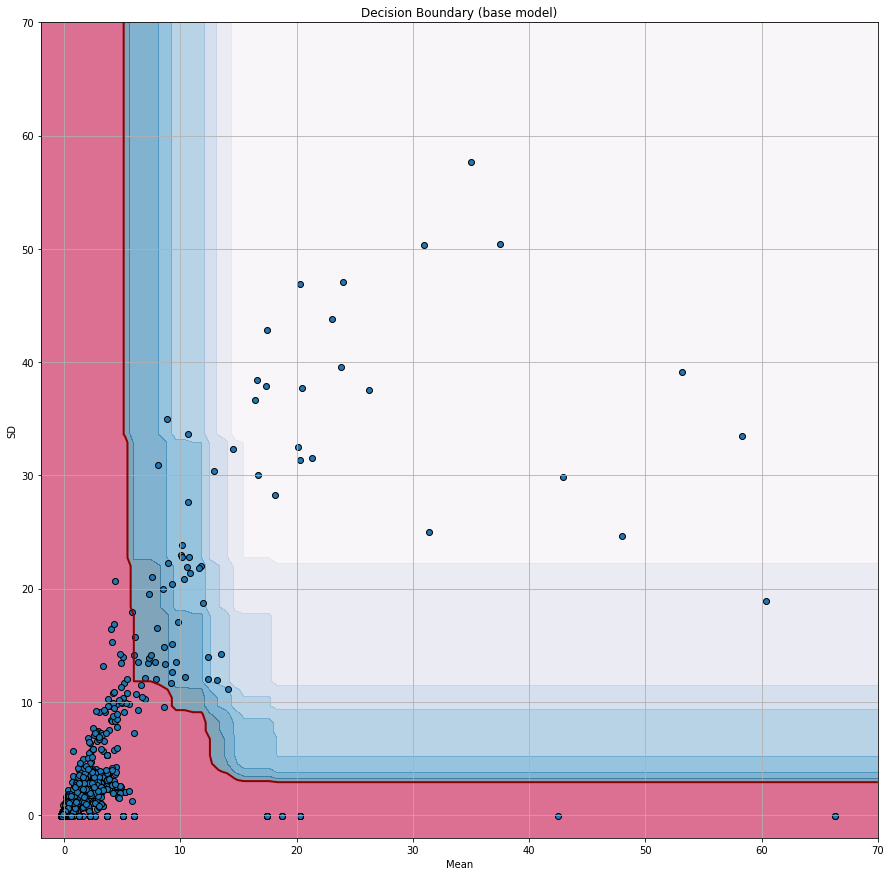

In [15]:
# A note should be added about variable names (clf = model on my end, and X_Train = train on my end)
# A note should be added about pictures showing what the plots/visualizations look like after running them for module 2 (module 3 got it right)
# See Note 1 below is actually Workflow #10

# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train.iloc[:, 0],
            train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [55]:
model.predict(test)

array([1, 1, 1, ..., 1, 1, 1])

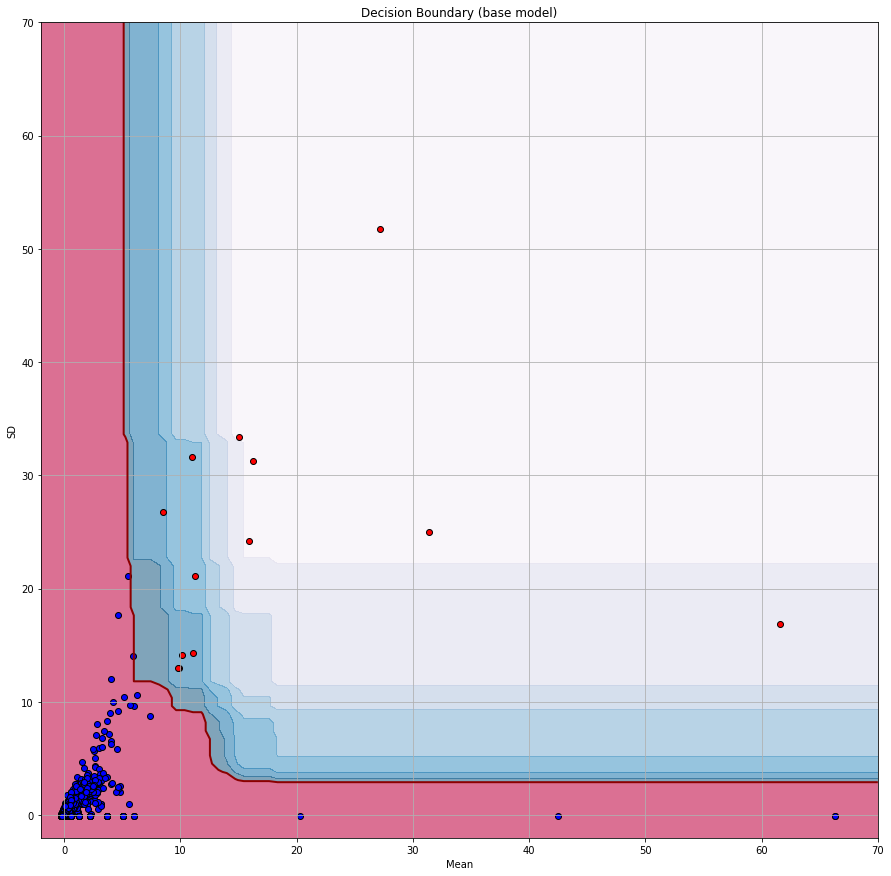

In [52]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier

test_predictions = pd.concat([test, pd.Series(model.predict(test))], axis=1)
test_predictions.columns = ['mean', 'sd', 'output']

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')


plt.scatter(
            test_predictions[test_predictions['output'] == 1].iloc[:, 0],
            test_predictions[test_predictions['output'] == 1].iloc[:, 1],
            edgecolors='k',
            c='blue'
)
plt.scatter(
            test_predictions[test_predictions['output'] == -1].iloc[:, 0],
            test_predictions[test_predictions['output'] == -1].iloc[:, 1],
            edgecolors='k',
            c='red'
)
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [57]:
from joblib import dump, load

In [58]:
dump(Z, 'model.joblib')

['model.joblib']